### Note

Made a few changes to this after the final class. I added histograms of predictions vs. targets. I finished cleaning and preprocessing the testing dataset so that I could make predictions on it using SGDRegressor. Lastly, I added an xlabel to the log scale histograms of the categorical data.

This notebook contains all of the data cleaning and preprocessing, all of my work with the SGDRegressor which includes the predictions made on the testing dataset, and some work with the other three models so that I could do some comparisons in this notebook. For the full code I wrote using the other models, that is in the notebook for those models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### Organizing Data and Getting it Ready for Use in Regression Models

In [5]:
categorical = []
for column in train.columns:
    if isinstance(train[column][0], str):
        categorical.append(column)

In [6]:
for column in train.columns:
    print(type(train[column][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int6

In [7]:
numeric = []
questionable = []
for column in train.columns:
    if isinstance(train[column][0], np.int64):
        numeric.append(column)
    elif isinstance(train[column][0], np.float64):
        numeric.append(column)
    elif isinstance(train[column][0], float):
        if str(train[column][0]) != 'nan':
            numeric.append(column)
        else:
            questionable.append(column)

In [8]:
del(numeric[37])

In [9]:
del(numeric[0])

In [10]:
questionable

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [11]:
for q in questionable:
    for i in range(len(train[q])):
        if not isinstance(train[q][i], float):
            print(type(train[q][i]), train[q][i], q)
            break

<class 'str'> Grvl Alley
<class 'str'> TA FireplaceQu
<class 'str'> Ex PoolQC
<class 'str'> MnPrv Fence
<class 'str'> Shed MiscFeature


In [12]:
for q in questionable:
    categorical.append(q)

##### Scatterplots with Numeric Features

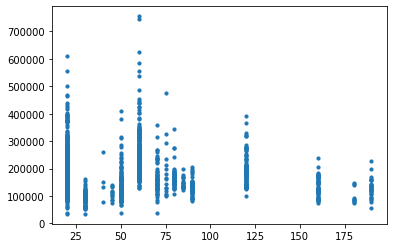

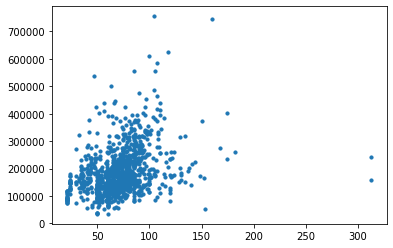

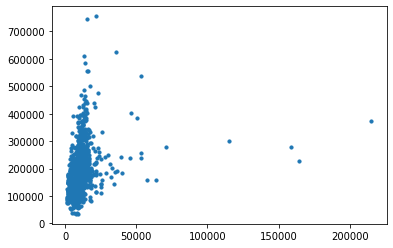

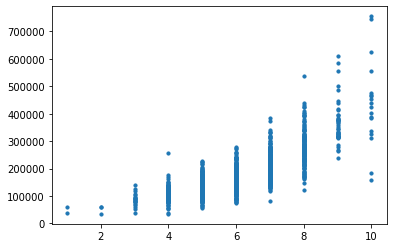

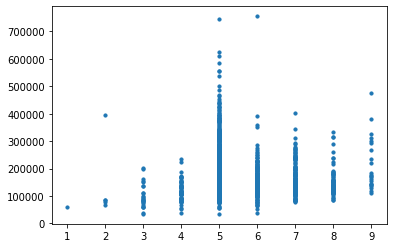

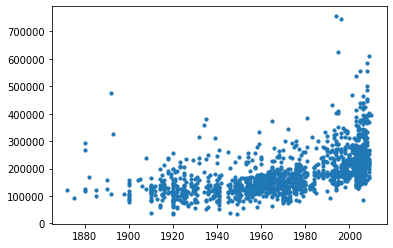

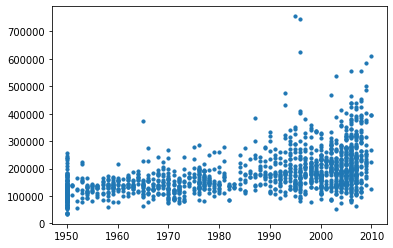

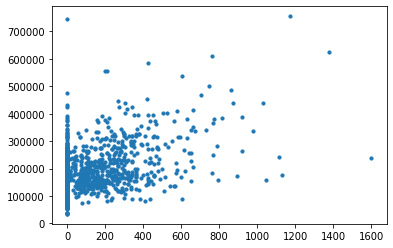

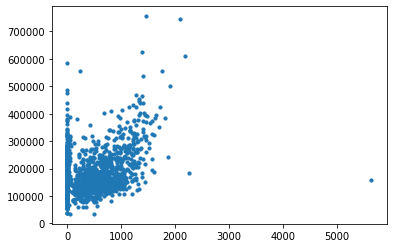

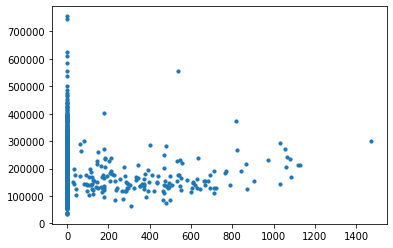

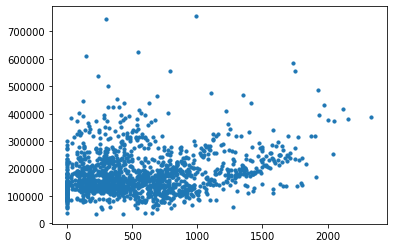

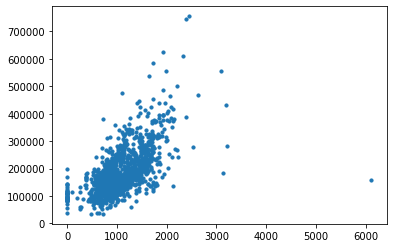

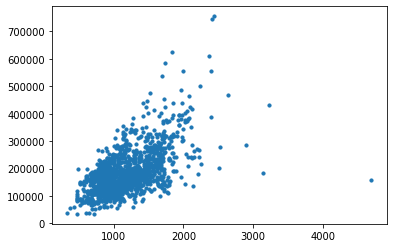

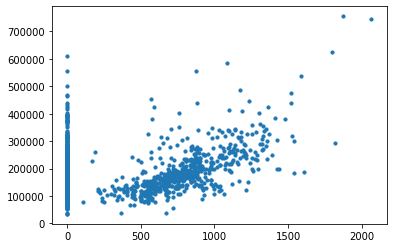

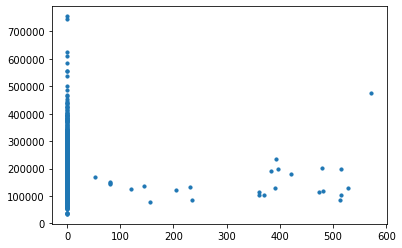

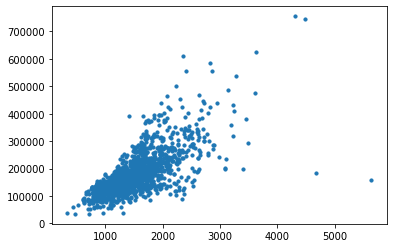

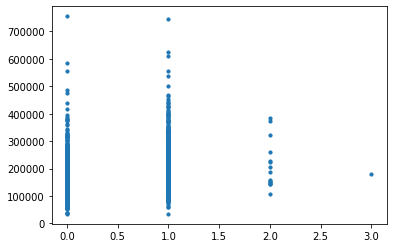

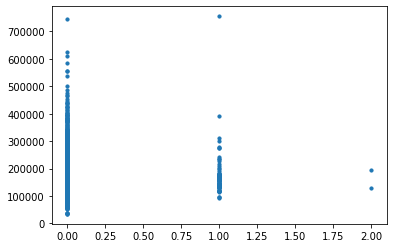

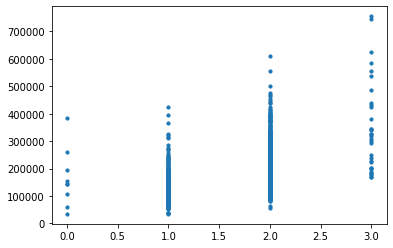

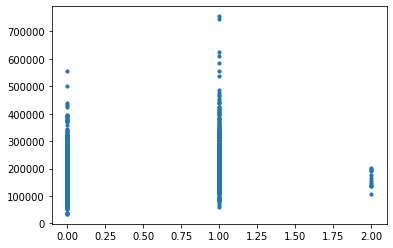

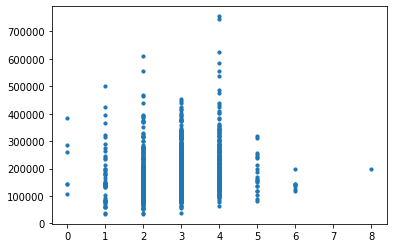

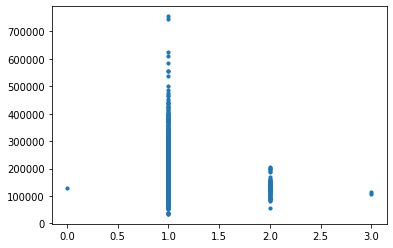

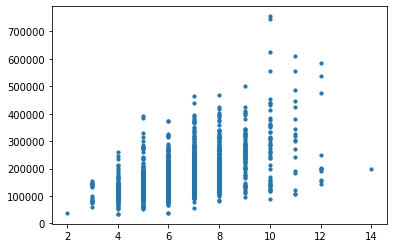

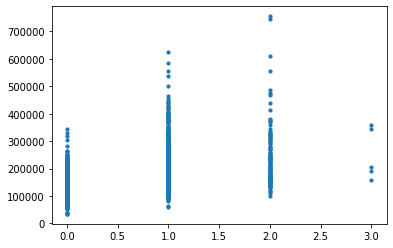

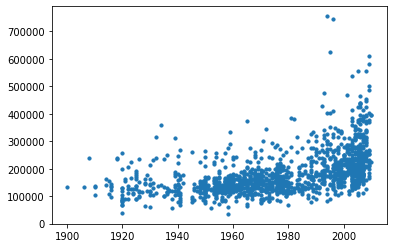

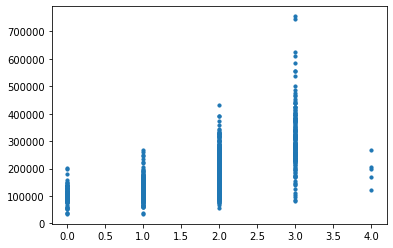

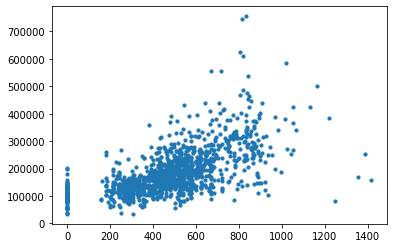

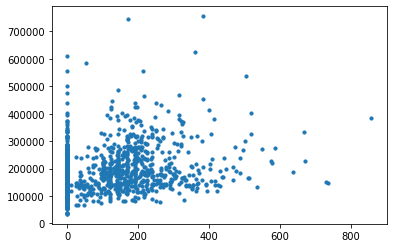

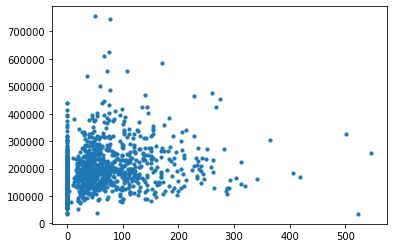

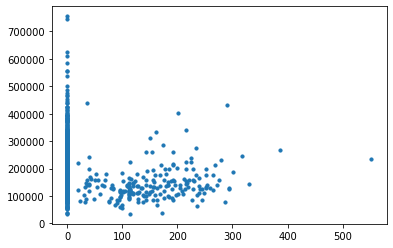

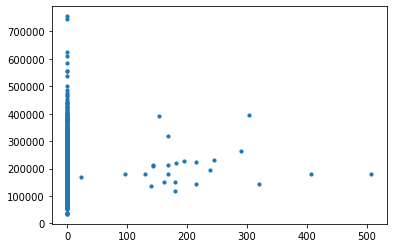

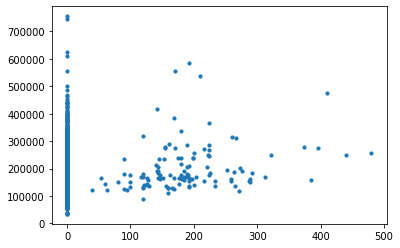

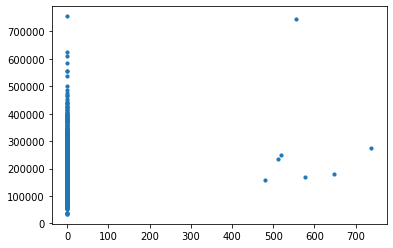

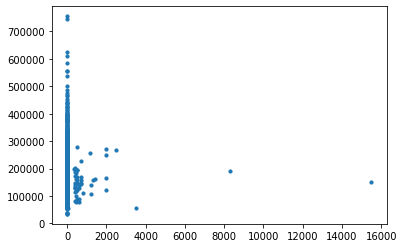

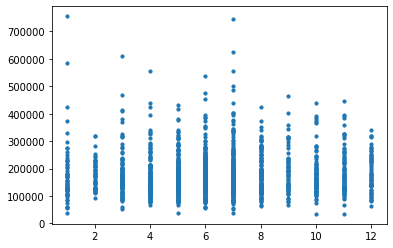

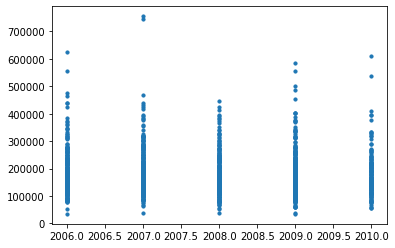

In [13]:
for num in numeric:
    plt.scatter(train[num], train.SalePrice, s = 10)
    plt.show()

##### Histograms with Categorical Features

In [14]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [15]:
np.where(train['MSZoning'] == 'FV')

(array([  47,   56,   87,  105,  115,  158,  180,  212,  240,  256,  270,
         281,  285,  297,  317,  377,  381,  399,  409,  412,  453,  460,
         501,  507,  525,  549,  578,  603,  623,  641,  644,  650,  686,
         687,  699,  755,  758,  762,  824,  829,  831,  864,  875,  885,
         914,  959,  973,  975,  977,  989, 1087, 1089, 1091, 1172, 1191,
        1217, 1246, 1265, 1317, 1358, 1364, 1365, 1374, 1442, 1454]),)

In [16]:
where = np.where(train['MSZoning'] == 'RM')
for i in where:
    print(train.SalePrice[i])

8       129900
15      132000
21      139400
23      129900
29       68500
         ...  
1428    119000
1438    149700
1441    149300
1449     92000
1452    145000
Name: SalePrice, Length: 218, dtype: int64


In [298]:
def histogram(category):
    for u in train[category].unique():
        x = []
        where = np.where(train[category] == u)
        for i in where:
            x.append(train.SalePrice[i])
        plt.hist(x, bins = 10, histtype = 'barstacked', density = True, label = u, log = True)
        plt.xlabel('Sales Prices')
        plt.title(category)
        plt.legend(loc = 'upper right')
    plt.show()

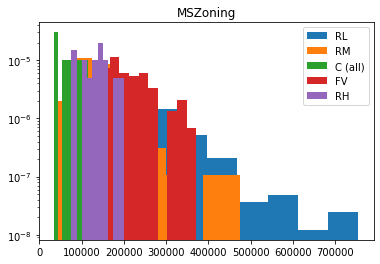

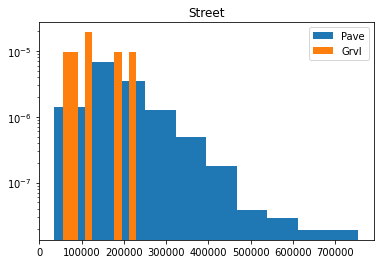

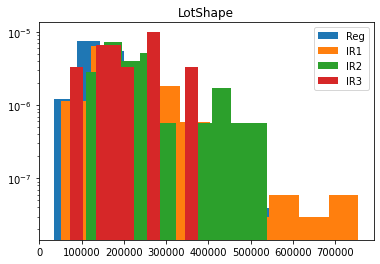

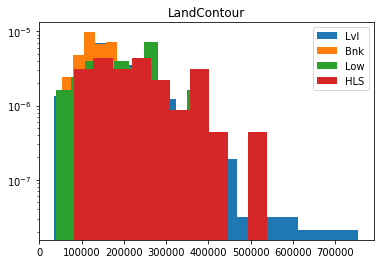

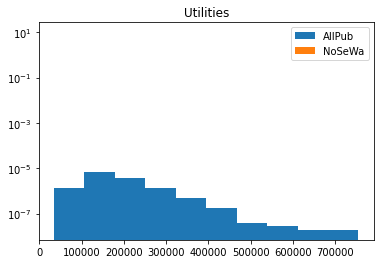

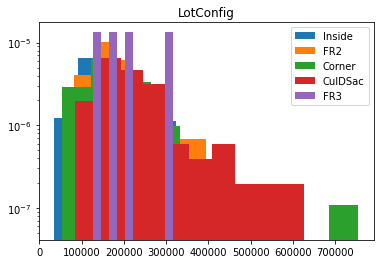

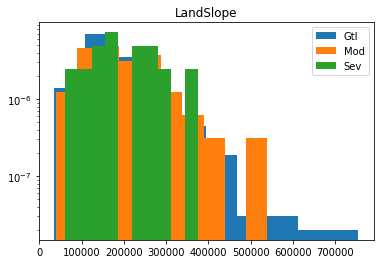

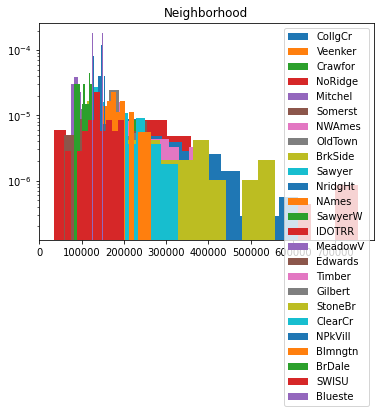

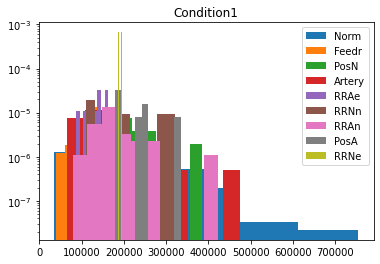

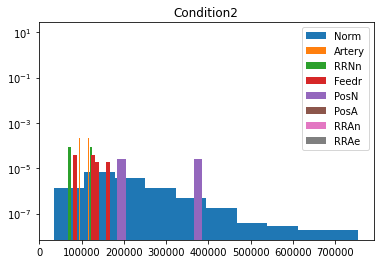

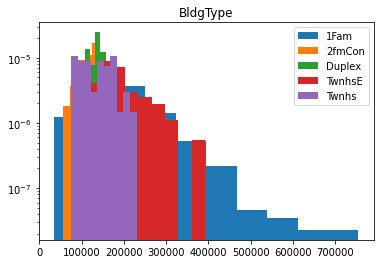

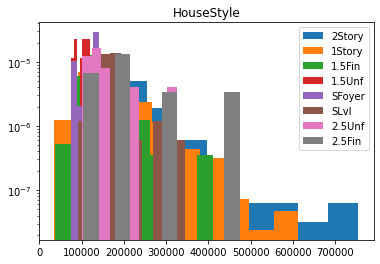

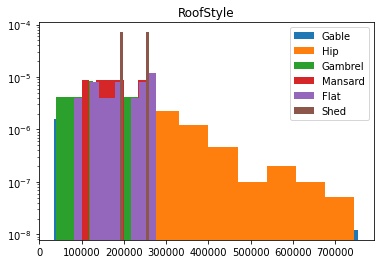

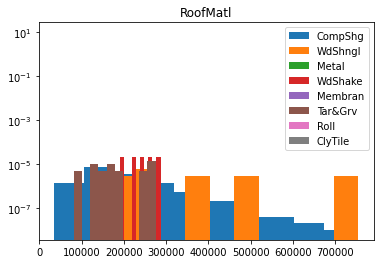

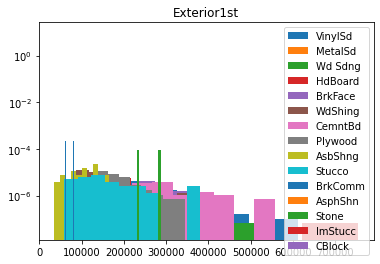

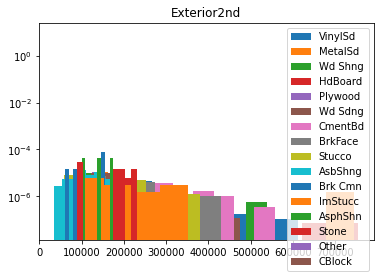

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


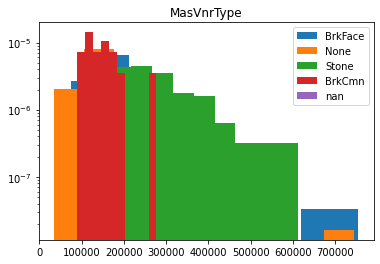

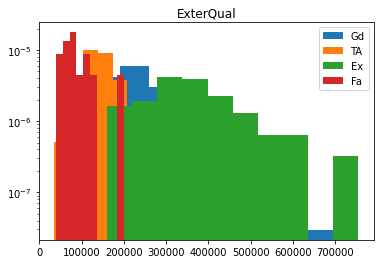

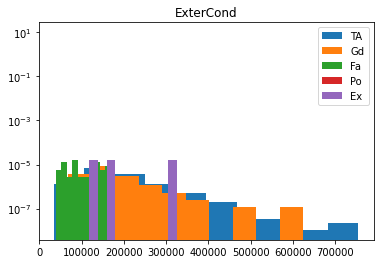

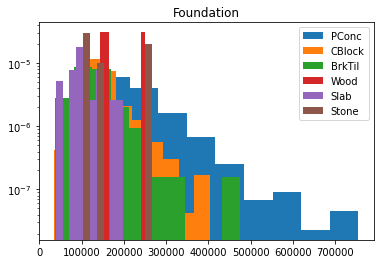

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


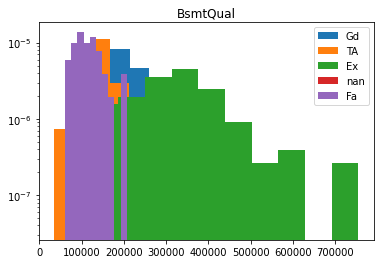

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


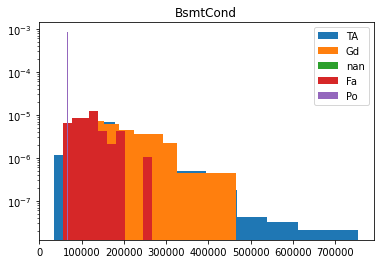

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


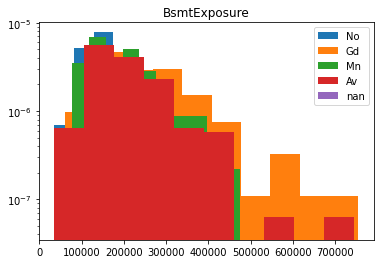

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


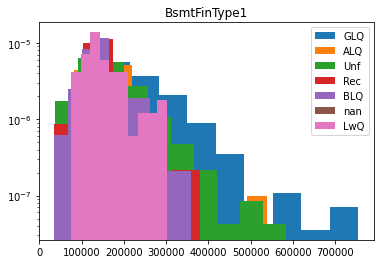

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


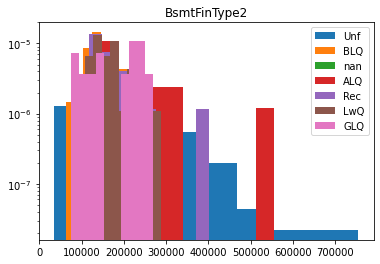

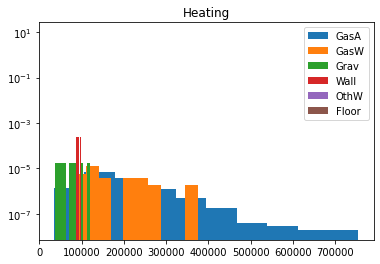

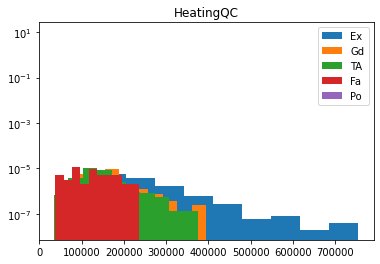

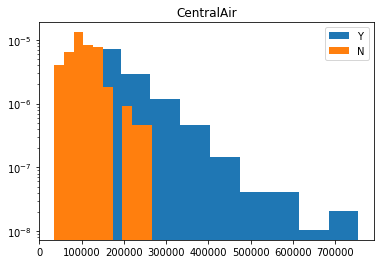

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


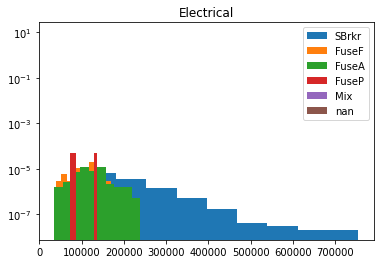

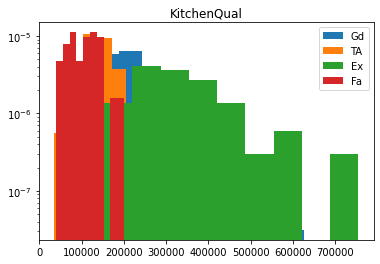

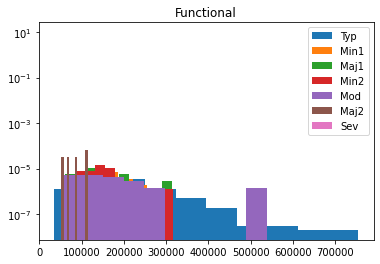

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


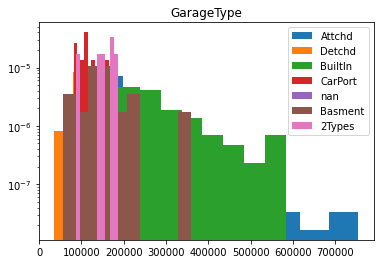

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


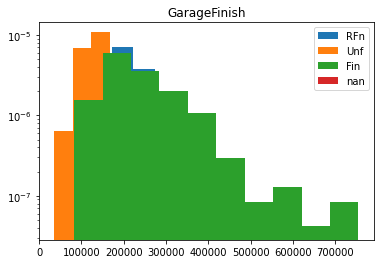

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


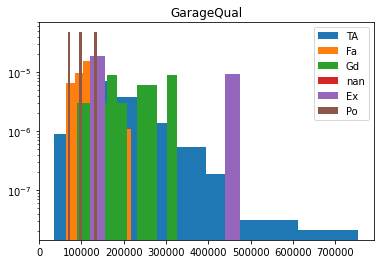

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


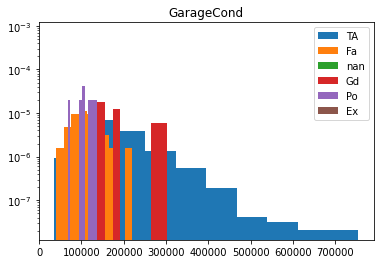

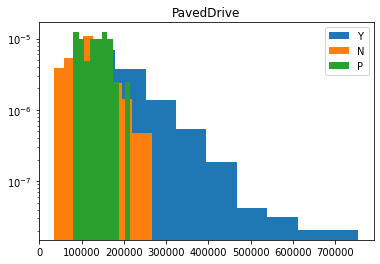

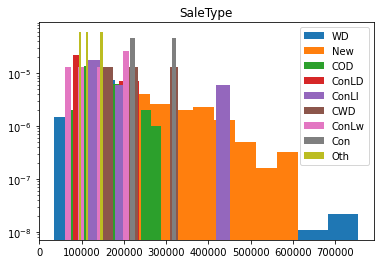

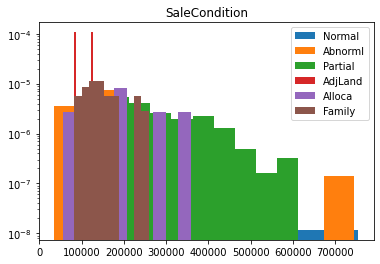

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


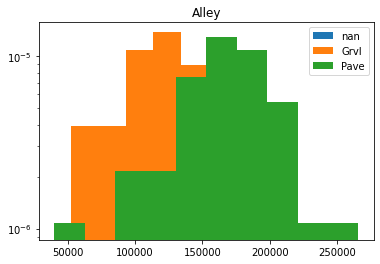

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


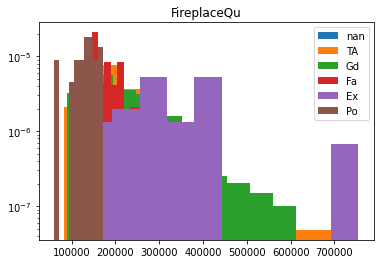

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


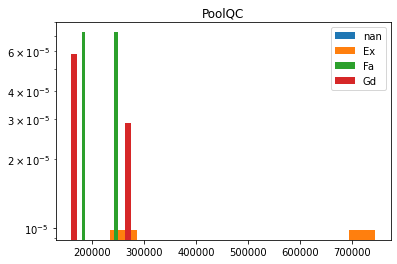

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


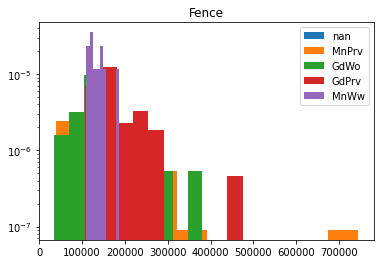

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


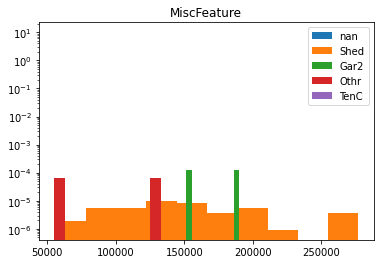

In [18]:
for cat in categorical:
    histogram(cat)

In [19]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [20]:
houseID = train.Id
train = train.drop(columns = 'Id')

In [21]:
features = train.drop(columns = 'SalePrice')
target = train.SalePrice

In [22]:
features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [23]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

##### Checking NaN Columns

In [24]:
nan_list = []
for col in train.columns:
    for i in range(len(train[col])):
        if str(train[col][i]) == 'nan':
            nan_list.append(col)
            break

In [25]:
nan_list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [26]:
counts = []
for n in nan_list:
    nan_count = 0
    for i in train[n]:
        if str(i) == 'nan':
            nan_count +=1
    counts.append(nan_count)

In [27]:
nan_list, counts

(['LotFrontage',
  'Alley',
  'MasVnrType',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Electrical',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PoolQC',
  'Fence',
  'MiscFeature'],
 [259,
  1369,
  8,
  8,
  37,
  37,
  38,
  37,
  38,
  1,
  690,
  81,
  81,
  81,
  81,
  81,
  1453,
  1179,
  1406])

In [28]:
c = 0
for v in train.Alley:
    if str(v) == 'nan':
        c += 1

In [29]:
c2 = 0
for v in train.FireplaceQu:
    if str(v) == 'nan':
        c2 += 1

In [30]:
c3 = 0
for v in train.PoolQC:
    if str(v) == 'nan':
        c3 += 1

In [31]:
c4 = 0
for v in train.Fence:
    if str(v) == 'nan':
        c4 += 1

In [32]:
c5 = 0
for v in train.MiscFeature:
    if str(v) == 'nan':
        c5 += 1

In [33]:
c/1460, c2/1460, c3/1460, c4/1460, c5/1460

(0.9376712328767123,
 0.4726027397260274,
 0.9952054794520548,
 0.8075342465753425,
 0.963013698630137)

##### Dropping These Columns

In [34]:
to_drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [35]:
features.shape

(1460, 79)

In [36]:
for d in to_drop:
    features = features.drop(columns = d)

In [37]:
features.shape

(1460, 74)

In [38]:
nan_cols = [n for n in nan_list if n not in to_drop]

##### Normalizing Numeric Data with MinMaxScaler

In [39]:
for num in numeric:
    features[numeric] = features[numeric].astype(float)

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
scaler.fit(features[numeric])

MinMaxScaler()

In [43]:
features[numeric] = scaler.transform(features[numeric])

In [44]:
features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,RL,0.150685,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,WD,Normal
1,0.000000,RL,0.202055,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25,WD,Normal
2,0.235294,RL,0.160959,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50,WD,Normal
3,0.294118,RL,0.133562,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00,WD,Abnorml
4,0.235294,RL,0.215753,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,RL,0.140411,0.030929,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25,WD,Normal
1456,0.000000,RL,0.219178,0.055505,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00,WD,Normal
1457,0.294118,RL,0.154110,0.036187,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00,WD,Normal
1458,0.000000,RL,0.160959,0.039342,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00,WD,Normal


##### Clearing Other NaN Data

In [45]:
for n in nan_cols:
    if n in numeric:
        print(n)

LotFrontage
MasVnrArea
GarageYrBlt


In [46]:
nan_numeric = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [47]:
features.GarageYrBlt

0       0.936364
1       0.690909
2       0.918182
3       0.890909
4       0.909091
          ...   
1455    0.900000
1456    0.709091
1457    0.372727
1458    0.454545
1459    0.590909
Name: GarageYrBlt, Length: 1460, dtype: float64

In [48]:
median_LF, median_MVA, median_GYB = features.LotFrontage.describe()[5], features.MasVnrArea.describe()[5], features.GarageYrBlt.describe()[5]

In [49]:
median_LF, median_MVA, median_GYB

(0.1643835616438356, 0.0, 0.7272727272727266)

In [50]:
nan = train.Alley[0]

In [51]:
count = 0
for i in features.LotFrontage:
    if i == median_LF:
        count += 1

In [52]:
count

11

In [53]:
count = 0
for i in features.LotFrontage:
    if str(i) == 'nan':
        count += 1

In [54]:
count

259

In [55]:
for n in nan_numeric:
    median = features[n].describe()[5]
    features[n] = features[n].replace(to_replace = nan, value = median)

In [56]:
count = 0
for i in features.LotFrontage:
    if str(i) == 'nan':
        count += 1

In [57]:
count

0

In [58]:
count = 0
for i in features.LotFrontage:
    if i == median_LF:
        count += 1

In [59]:
count

270

In [60]:
count = 0
for i in features.MasVnrArea:
    if i == median_MVA:
        count += 1

In [61]:
count

869

In [62]:
count = 0
for i in train.MasVnrArea:
    if i == median_MVA:
        count += 1

In [63]:
count

861

In [64]:
count = 0
for i in features.GarageYrBlt:
    if i == features.GarageYrBlt.describe()[5]:
        count += 1

In [65]:
count

96

In [66]:
features.MSZoning.mode()

0    RL
Name: MSZoning, dtype: object

In [67]:
features.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [68]:
nan_categorical = [n for n in nan_cols if n in categorical]

In [69]:
for n in nan_categorical:
    features[n] = features[n].astype(str)

In [70]:
for n in nan_categorical:
    mode = features[n].mode()[0]
    features[n] = features[n].replace(to_replace = 'nan', value = mode)

In [71]:
nan_categorical

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [72]:
features.BsmtCond.value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [73]:
count = 0
for i in features.BsmtCond:
    if i == features.BsmtCond.mode()[0]:
        count += 1

In [74]:
count

1348

In [75]:
cat_vars = [cat for cat in categorical if cat not in to_drop]

In [76]:
cat_vars

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [77]:
features = pd.get_dummies(features, columns = cat_vars)

In [78]:
features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0,0,0,1,0,0,0,0,1,0
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0,0,0,1,0,0,0,0,1,0
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0,0,0,1,0,0,0,0,1,0


##### Doing Categorical Log Scale Histograms Over

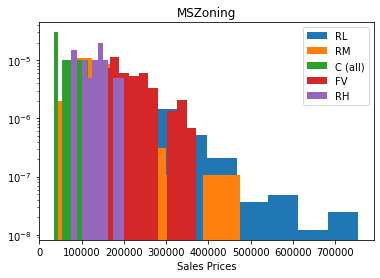

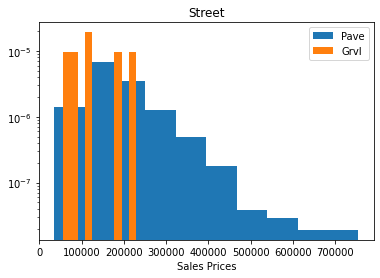

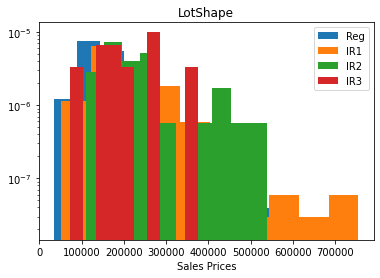

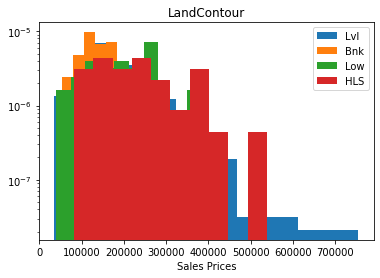

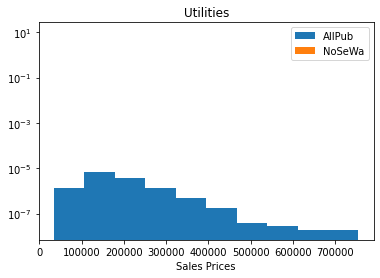

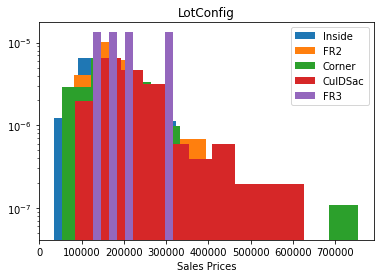

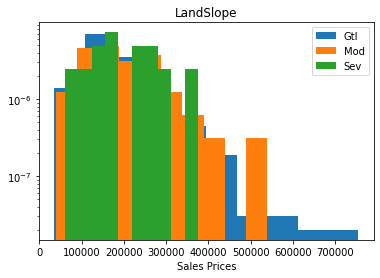

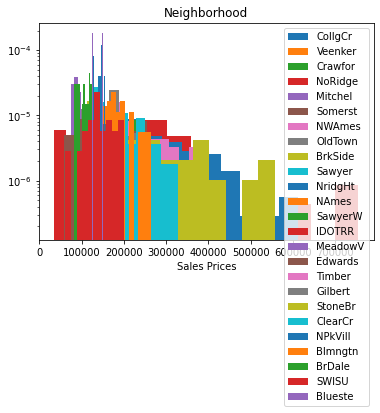

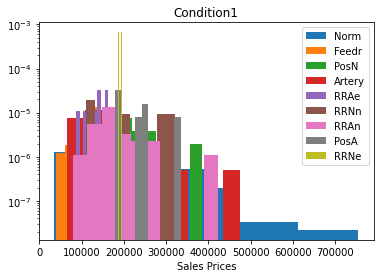

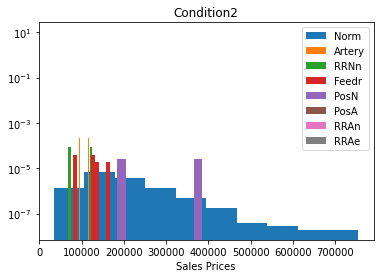

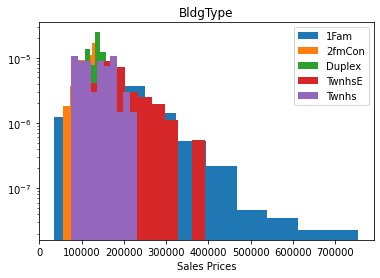

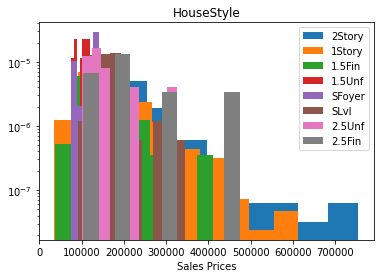

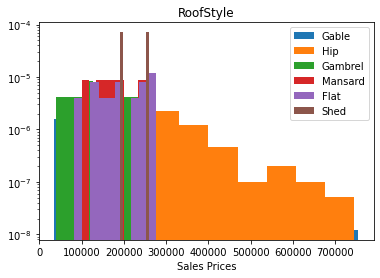

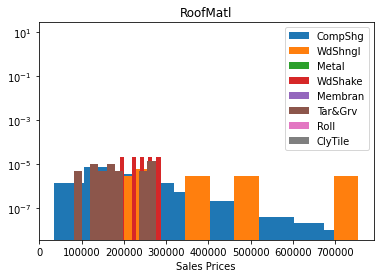

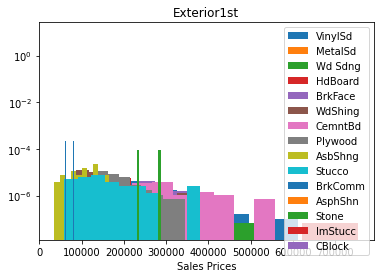

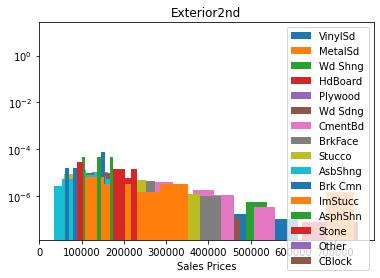

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


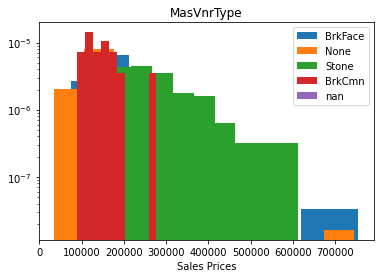

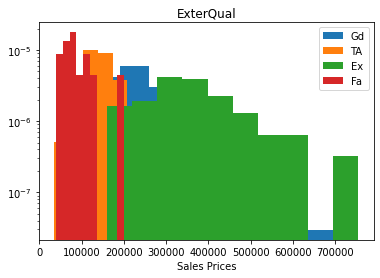

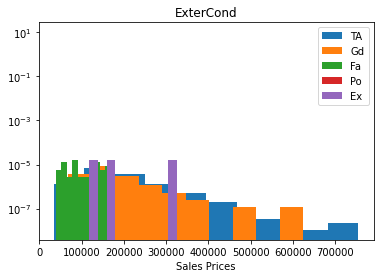

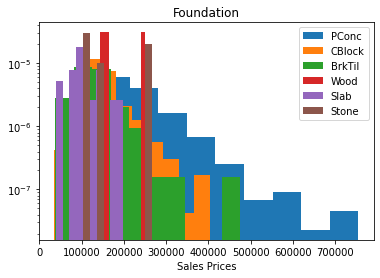

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


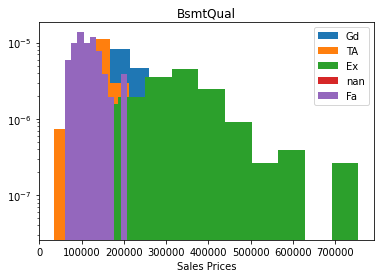

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


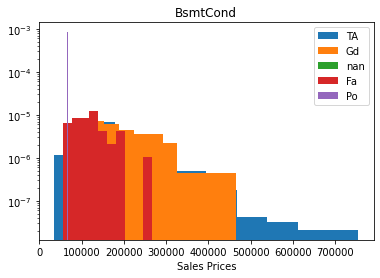

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


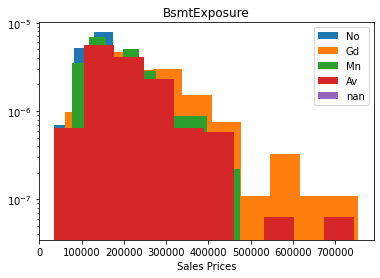

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


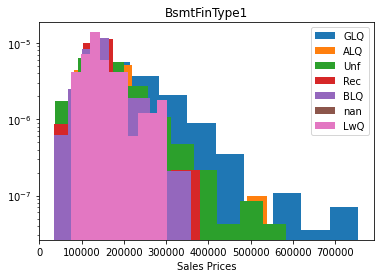

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


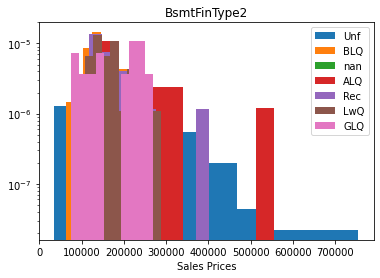

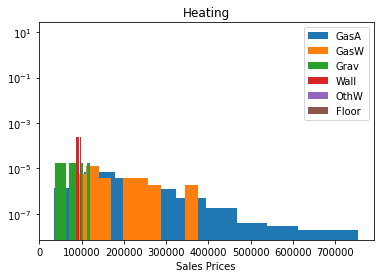

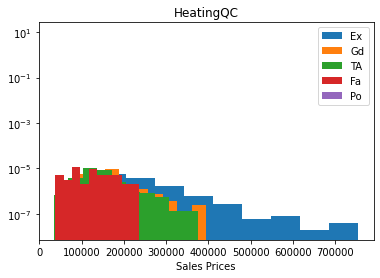

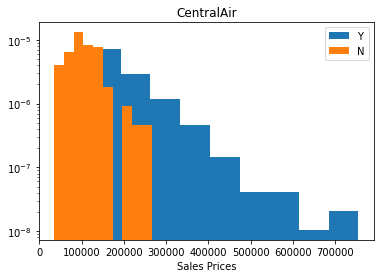

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


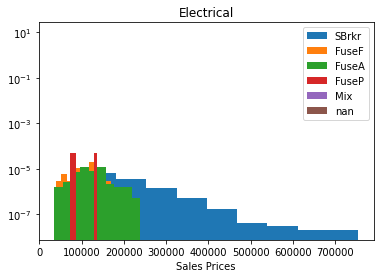

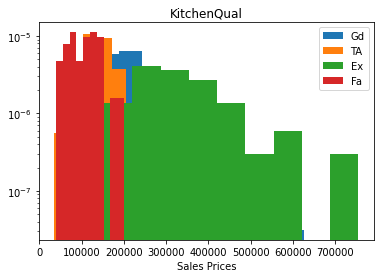

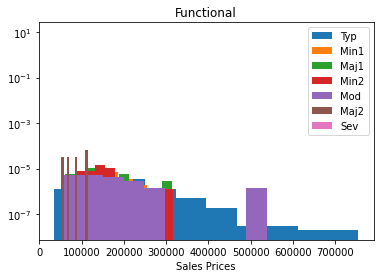

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


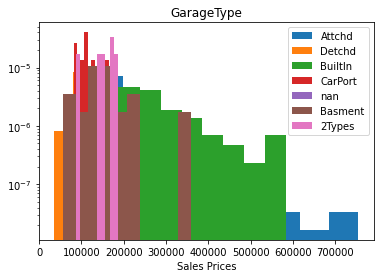

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


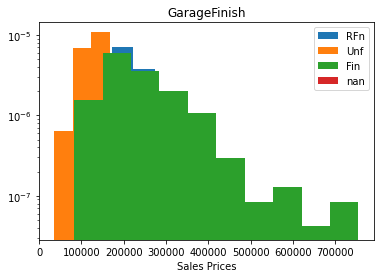

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


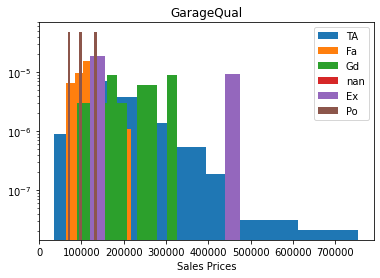

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


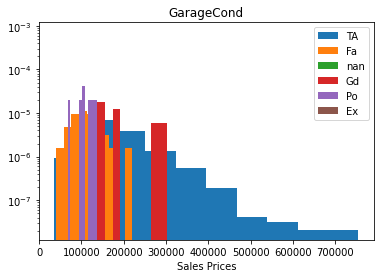

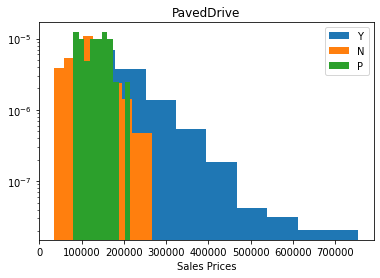

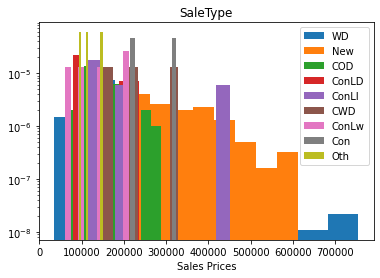

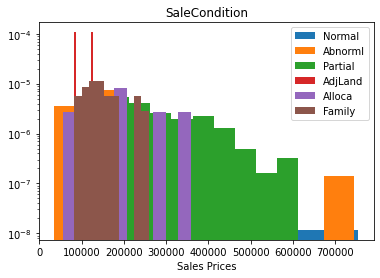

In [299]:
for var in cat_vars:
    histogram(var)

##### Numeric Variable Scatterplots

In [80]:
def scatterplot(var):
    m, b = np.polyfit(features[var], target, 1)
    plt.scatter(features[var], target)
    plt.plot(features[var], (m * features[var]) + b, color = 'red')
    plt.ylabel('Sales Price')
    plt.title(var)
    plt.show()

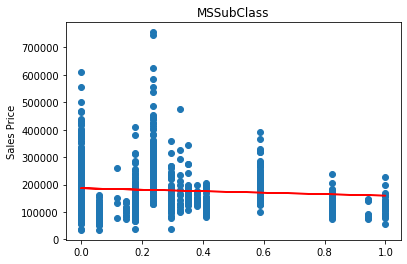

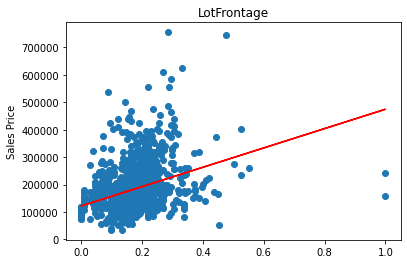

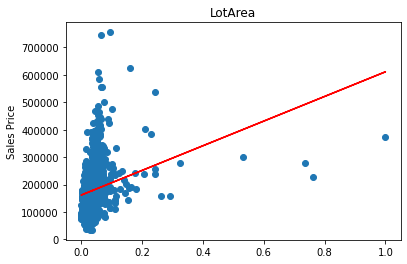

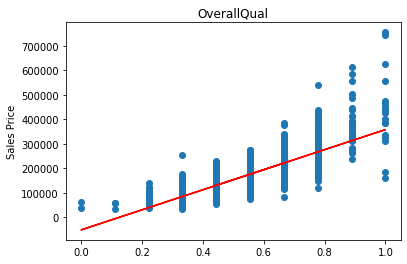

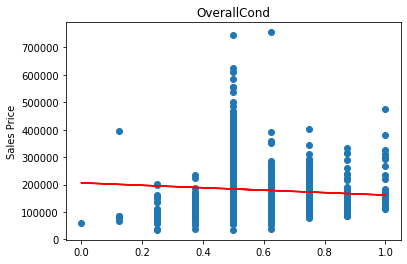

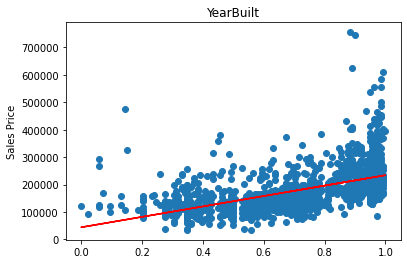

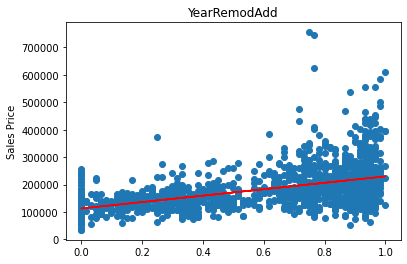

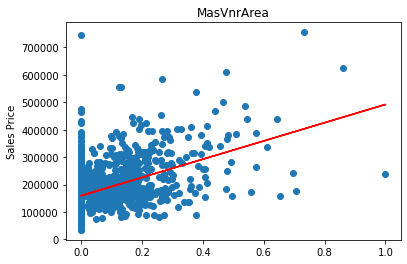

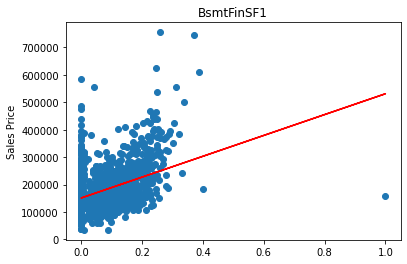

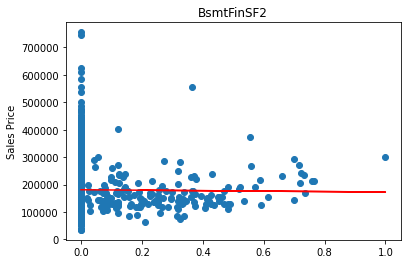

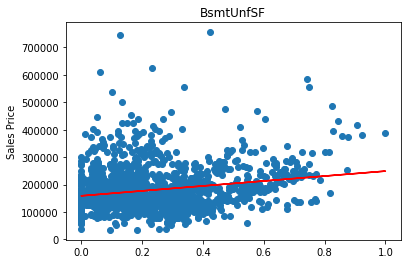

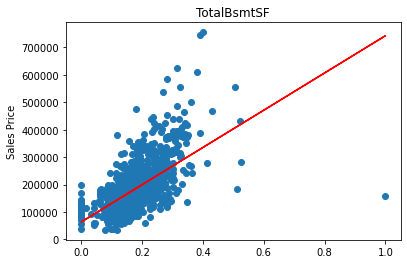

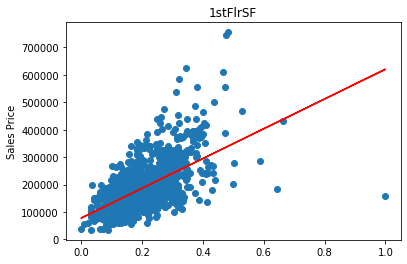

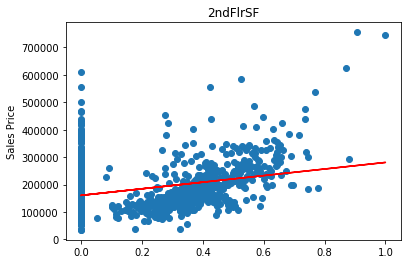

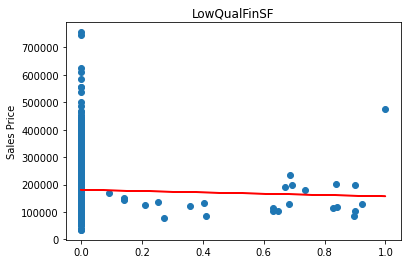

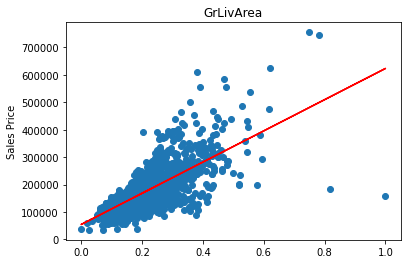

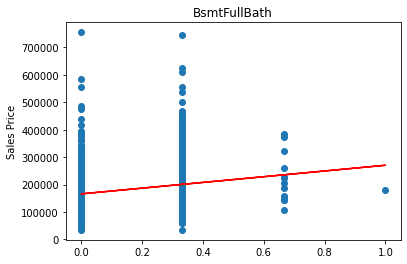

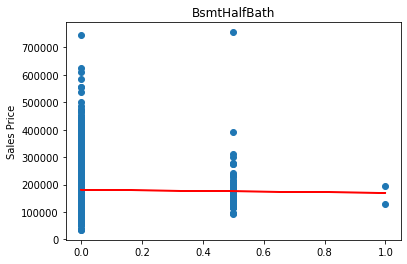

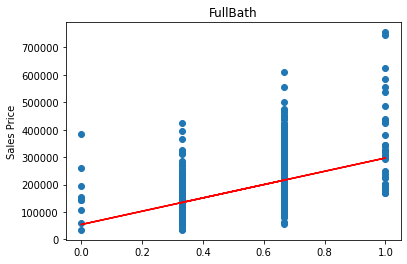

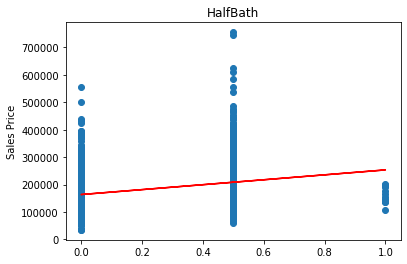

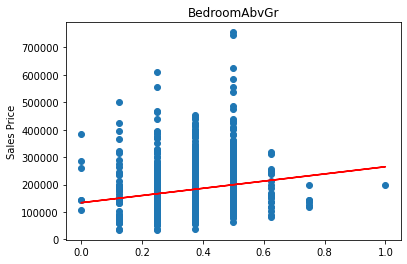

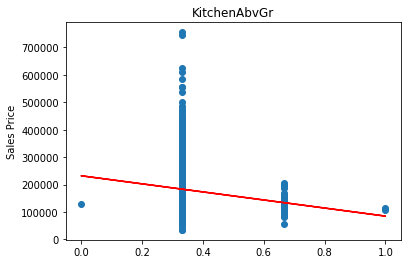

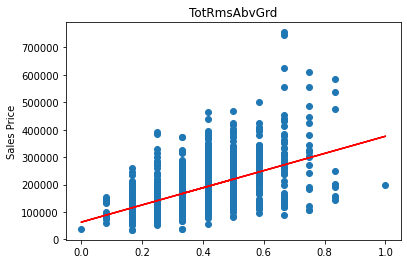

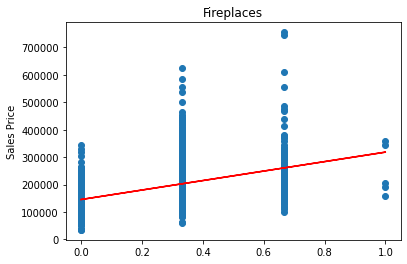

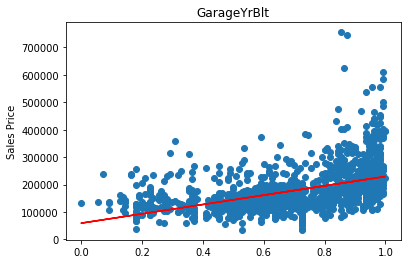

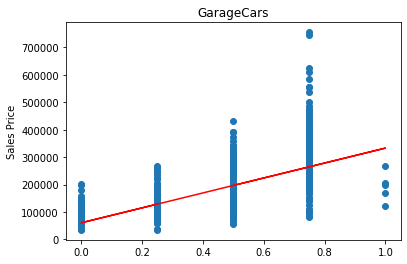

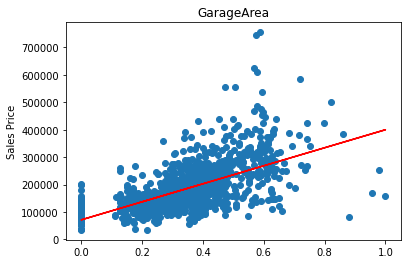

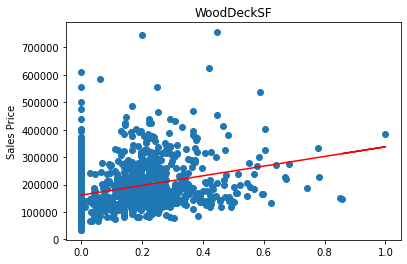

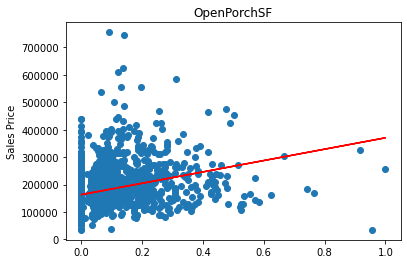

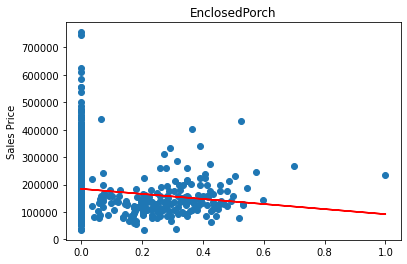

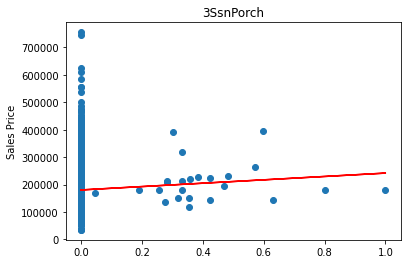

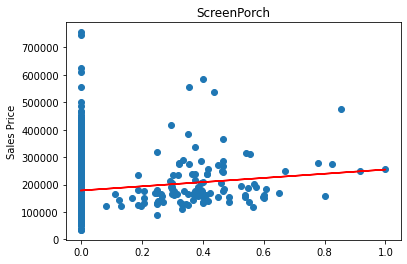

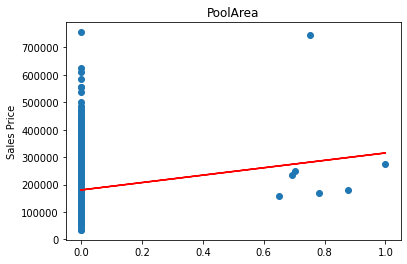

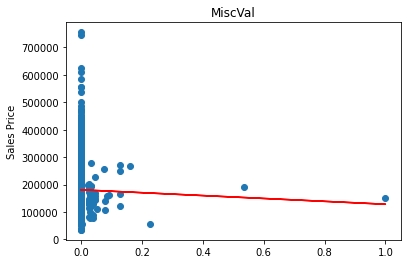

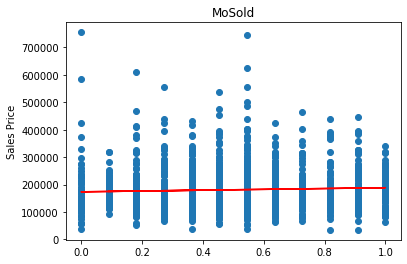

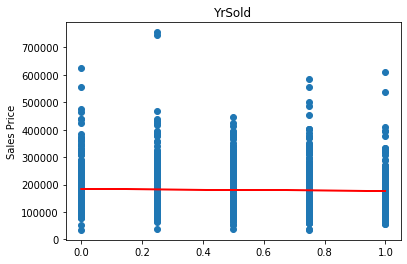

In [81]:
for var in numeric:
    scatterplot(var)

##### Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.4)

In [85]:
x_train.shape, x_test.shape

((876, 270), (584, 270))

In [86]:
y_train.shape, y_test.shape

((876,), (584,))

### SGDRegressor

##### Using Permutation_Importance for Feature Selection

In [240]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import SGDRegressor

In [241]:
reg = SGDRegressor()

In [242]:
reg.fit(x_train, y_train)

SGDRegressor()

In [243]:
result = permutation_importance(reg, x_train, y_train)

In [244]:
result

{'importances_mean': array([ 1.37280572e-03,  3.14893771e-04,  4.01549485e-04,  2.24034147e-02,
         2.43767559e-03,  1.32256430e-03,  5.73929021e-03,  6.12303601e-03,
         2.73657819e-03,  8.37881378e-05,  2.61879103e-03,  3.37627813e-03,
         7.35811842e-03,  1.81141053e-02,  1.31855974e-05,  1.09641546e-02,
         2.27782478e-03,  2.16615561e-05,  1.35261207e-02,  2.65496487e-03,
         1.16816959e-04, -8.63601503e-06,  1.07648633e-02,  9.75242745e-03,
         1.55711236e-04,  6.54347216e-03,  7.65857181e-03,  1.89509698e-03,
         1.34737973e-03,  2.61307855e-07,  4.27619554e-05,  5.87252667e-04,
         1.83070167e-06,  4.22491020e-06,  6.94768236e-04,  1.12292996e-04,
         1.27290179e-04, -1.05044112e-06,  2.82713405e-05,  1.49858503e-03,
         9.27309885e-05,  5.05885036e-05,  1.05563904e-04,  7.19453834e-04,
         3.01625727e-04,  4.35265336e-05,  5.07761633e-04,  1.73893750e-04,
        -6.79011471e-06,  3.19216182e-04,  9.15016305e-04,  0.000000

In [245]:
best_features = []
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        best_features.append(x_train.columns[i])
        print(f"{x_train.columns[i]:<8}"
              f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")

OverallQual0.022 +/- 0.003
2ndFlrSF0.018 +/- 0.002
BsmtExposure_Gd0.015 +/- 0.003
FullBath0.014 +/- 0.001
KitchenQual_Ex0.012 +/- 0.002
GrLivArea0.011 +/- 0.001
TotRmsAbvGrd0.011 +/- 0.002
Fireplaces0.010 +/- 0.001
BsmtQual_Ex0.010 +/- 0.001
Neighborhood_StoneBr0.009 +/- 0.001
BsmtExposure_No0.009 +/- 0.001
BldgType_1Fam0.008 +/- 0.001
GarageArea0.008 +/- 0.001
1stFlrSF0.007 +/- 0.001
BsmtFinType1_GLQ0.007 +/- 0.002
GarageCars0.007 +/- 0.002
Neighborhood_NAmes0.006 +/- 0.001
Neighborhood_NoRidge0.006 +/- 0.001
MasVnrArea0.006 +/- 0.001
YearRemodAdd0.006 +/- 0.002
Neighborhood_Crawfor0.005 +/- 0.000
LotConfig_CulDSac0.005 +/- 0.001
KitchenQual_TA0.004 +/- 0.001
Neighborhood_Gilbert0.004 +/- 0.001
ExterQual_Ex0.004 +/- 0.000
Neighborhood_NridgHt0.004 +/- 0.001
ExterQual_TA0.004 +/- 0.001
Condition1_Norm0.003 +/- 0.001
TotalBsmtSF0.003 +/- 0.001
Neighborhood_CollgCr0.003 +/- 0.000
SaleType_WD0.003 +/- 0.001
BsmtFinSF10.003 +/- 0.000
BsmtQual_Gd0.003 +/- 0.001
Neighborhood_Edwards0.003 +/-

In [246]:
f_range = range(5, 11)

In [247]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [248]:
n_features = range(5, 11)
scores = []
r2s = []
for n in n_features:
    f_list = [best_features[i] for i in range(n)]
    reg = SGDRegressor()
    reg.fit(x_train[f_list], y_train)
    y_predictions = reg.predict(x_test[f_list])
    mse = mean_squared_error(y_test, y_predictions)
    rmse = math.sqrt(mse)
    scores.append(rmse)
    sgd_r2 = r2_score(y_test, y_predictions)
    r2s.append(sgd_r2)

/home/clay/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [249]:
scores, r2s

([47685.52134506389,
  44767.30713311822,
  44705.77793025582,
  44623.80869698966,
  43654.308609871936,
  43369.7016027193],
 [0.680271240017408,
  0.7182067567089008,
  0.7189808304478855,
  0.7200103979602759,
  0.7320443852366181,
  0.7355269027882578])

The best RMSE and R2 scores come from the model using 8 features.

In [250]:
scores[3], r2s[3]

(44623.80869698966, 0.7200103979602759)

In [251]:
np.mean(target)

180921.19589041095

The closer the RMSE is to 0, the better, however RMSE scores fit the scale of the target variable. The mean of SalePrice is 180921.196. This explains the large RMSE scores.

Text(0, 0.5, 'RMSE')

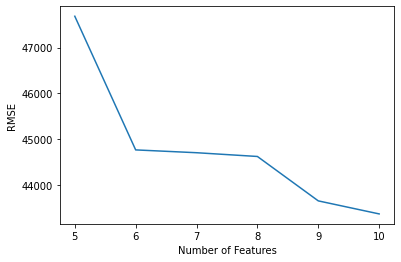

In [252]:
plt.plot(n_features, scores)
plt.xlabel('Number of Features')
plt.ylabel('RMSE')

Text(0, 0.5, 'R2 Scores')

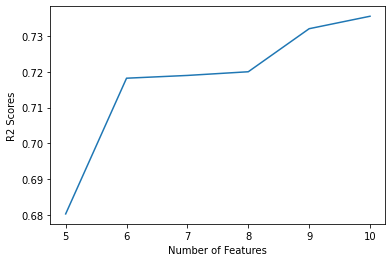

In [253]:
plt.plot(n_features, r2s)
plt.xlabel('Number of Features')
plt.ylabel('R2 Scores')

Both score plots show what might be the scores rising after dipping from 8 to 9 features. Going to expand the range and see how that looks.

In [254]:
n_features = range(5, 61)
scores = []
r2s = []
for n in n_features:
    f_list = [best_features[i] for i in range(n)]
    reg = SGDRegressor()
    reg.fit(x_train[f_list], y_train)
    y_predictions = reg.predict(x_test[f_list])
    mse = mean_squared_error(y_test, y_predictions)
    rmse = math.sqrt(mse)
    scores.append(rmse)
    sgd_r2 = r2_score(y_test, y_predictions)
    r2s.append(sgd_r2)

/home/clay/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Text(0, 0.5, 'RMSE')

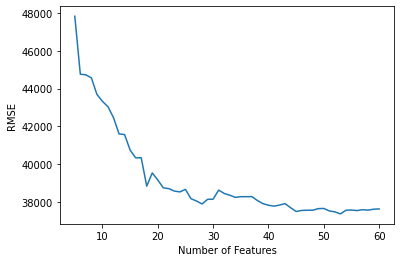

In [255]:
plt.plot(n_features, scores)
plt.xlabel('Number of Features')
plt.ylabel('RMSE')

Text(0, 0.5, 'R2 Scores')

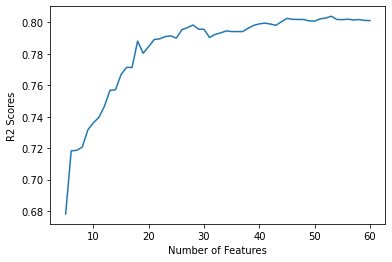

In [257]:
plt.plot(n_features, r2s)
plt.xlabel('Number of Features')
plt.ylabel('R2 Scores')

There's a very quick spike in R2 and decline in RMSE from 5 to 8 features used. That's followed by a dip in R2 and slight rise in RMSE from 8 to 9 before both scores continue their general trend. After a while, adding more features has diminishing returns. Trends slow down into the 40s and begin to level out into the 50s.

I would choose around 30 of the best features chosen by sklearn's permutation_importance function

In [258]:
f_list = [best_features[i] for i in range(30)]

##### Testing Different Loss Functions

In [259]:
functions = ['huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']

In [260]:
func_scores = []
func_r2s = []
for func in functions:
    sgd = SGDRegressor(loss = func)
    sgd.fit(x_train[f_list], y_train)
    y_predictions = sgd.predict(x_test[f_list])
    mse = mean_squared_error(y_test, y_predictions)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_predictions)
    func_scores.append(rmse)
    func_r2s.append(r2)

/home/clay/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [261]:
func_scores

[199444.3509535362, 197810.22268749247, 38221.33409085538]

In [262]:
func_r2s

[-4.593093929570042, -4.501816441218547, 0.7945905987908132]

In [263]:
sgd = SGDRegressor()
sgd.fit(x_train[f_list], y_train)
y_predictions = sgd.predict(x_test[f_list])
rmse = math.sqrt(mean_squared_error(y_test, y_predictions))
r2 = r2_score(y_test, y_predictions)

In [264]:
rmse, r2

(38122.00851963228, 0.7956568041854677)

Of the three alternative loss functions, squared epsilon insensitive performed by far the best and performed about as well as the squared error function did, but not quite as well.

##### Testing Different Penalties

In [265]:
p_scores = []
p_r2s = []
penalties = ['l1', 'elasticnet']
for v in penalties:
    sgd = SGDRegressor(penalty = v)
    sgd.fit(x_train[f_list], y_train)
    y_predictions = sgd.predict(x_test[f_list])
    rmse = math.sqrt(mean_squared_error(y_test, y_predictions))
    r2 = r2_score(y_test, y_predictions)
    p_scores.append(rmse)
    p_r2s.append(r2)

In [266]:
p_scores, p_r2s

([38126.550918034394, 38106.52869412685],
 [0.7956081045737651, 0.7958227217177929])

Neither of these alternative penalties have much of an affect on the data.

##### Histogramming Predictions vs. Target Variable

In [267]:
f_list = [best_features[i] for i in range(30)]
reg = SGDRegressor()
reg.fit(x_train[f_list], y_train)
y_predictions = reg.predict(x_test[f_list])

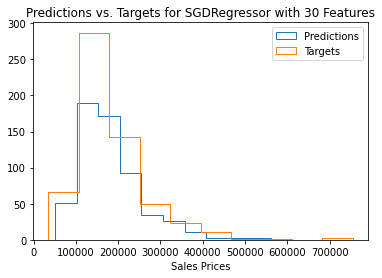

In [280]:
plt.hist(y_predictions, histtype = 'step', label = 'Predictions')
plt.hist(y_test, histtype = 'step', label = 'Targets')
plt.xlabel('Sales Prices')
plt.title('Predictions vs. Targets for SGDRegressor with 30 Features')
plt.legend(loc = 'upper right')
plt.show()

### Next Steps

### Comparison of Model Results

##### SVR

In [271]:
from sklearn.svm import SVR

In [272]:
svr = SVR()

In [273]:
svr.fit(x_train, y_train)

SVR()

In [274]:
svr_result = permutation_importance(svr, x_train, y_train)

In [275]:
svr_features = []
for i in svr_result.importances_mean.argsort()[::-1]:
    if svr_result.importances_mean[i] - 2 * svr_result.importances_std[i] > 0:
        svr_features.append(x_train.columns[i])
        print(f"{x_train.columns[i]:<8}"
              f"{svr_result.importances_mean[i]:.3f}"
              f" +/- {svr_result.importances_std[i]:.3f}")

ExterQual_TA0.000 +/- 0.000
GarageFinish_Unf0.000 +/- 0.000
BsmtQual_TA0.000 +/- 0.000
KitchenQual_TA0.000 +/- 0.000
Foundation_PConc0.000 +/- 0.000
ExterQual_Gd0.000 +/- 0.000
HeatingQC_Ex0.000 +/- 0.000
KitchenQual_Gd0.000 +/- 0.000
Foundation_CBlock0.000 +/- 0.000
YearRemodAdd0.000 +/- 0.000
GarageType_Detchd0.000 +/- 0.000
BsmtFinType1_GLQ0.000 +/- 0.000
BsmtQual_Gd0.000 +/- 0.000
HeatingQC_TA0.000 +/- 0.000
GarageFinish_Fin0.000 +/- 0.000
MasVnrType_None0.000 +/- 0.000
Exterior1st_VinylSd0.000 +/- 0.000
Exterior2nd_VinylSd0.000 +/- 0.000
BsmtExposure_No0.000 +/- 0.000
GarageType_Attchd0.000 +/- 0.000
LotShape_Reg0.000 +/- 0.000
YearBuilt0.000 +/- 0.000
MSZoning_RM0.000 +/- 0.000
HouseStyle_2Story0.000 +/- 0.000
GarageFinish_RFn0.000 +/- 0.000
MSZoning_RL0.000 +/- 0.000
GarageCars0.000 +/- 0.000
OverallQual0.000 +/- 0.000
GarageYrBlt0.000 +/- 0.000
Neighborhood_NAmes0.000 +/- 0.000
LotShape_IR10.000 +/- 0.000
FullBath0.000 +/- 0.000
Fireplaces0.000 +/- 0.000
MasVnrType_BrkFace0.000

In [276]:
f_list = [svr_features[i] for i in range(5)]
svr = SVR()
svr.fit(x_train[f_list], y_train)
y_svr = svr.predict(x_test[f_list])
svr_mse = mean_squared_error(y_test, y_svr)
svr_rmse = math.sqrt(mse)
svr_r2 = r2_score(y_test, y_svr)

In [277]:
svr_rmse, svr_r2

(38089.333852226824, -0.03241551718169933)

##### Histogramming Predictions vs. Targets Using SVR

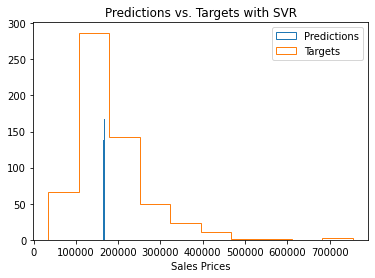

In [279]:
plt.hist(y_svr, histtype = 'step', label = 'Predictions')
plt.hist(y_test, histtype = 'step', label =  'Targets')
plt.xlabel('Sales Prices')
plt.title('Predictions vs. Targets with SVR')
plt.legend(loc = 'upper right')
plt.show()

##### ElasticNet

In [281]:
from sklearn.linear_model import ElasticNet

In [282]:
en = ElasticNet()

In [283]:
en.fit(x_train, y_train)

ElasticNet()

In [284]:
en_result = permutation_importance(en, x_train, y_train)

In [285]:
en_features = []
for i in en_result.importances_mean.argsort()[::-1]:
    if en_result.importances_mean[i] - 2 * en_result.importances_std[i] > 0:
        en_features.append(x_train.columns[i])
        print(f"{x_train.columns[i]:<8}"
              f"{en_result.importances_mean[i]:.3f}"
              f" +/- {en_result.importances_std[i]:.3f}")

BsmtQual_Ex0.020 +/- 0.002
ExterQual_TA0.019 +/- 0.002
KitchenQual_TA0.017 +/- 0.001
KitchenQual_Ex0.014 +/- 0.001
BsmtQual_TA0.013 +/- 0.001
MasVnrType_None0.013 +/- 0.001
GarageFinish_Unf0.013 +/- 0.001
Fireplaces0.010 +/- 0.001
HeatingQC_Ex0.010 +/- 0.001
OverallQual0.010 +/- 0.001
GarageFinish_Fin0.010 +/- 0.001
BsmtExposure_Gd0.009 +/- 0.001
GarageCars0.009 +/- 0.000
ExterQual_Ex0.008 +/- 0.001
BsmtExposure_No0.008 +/- 0.001
BsmtFinType1_GLQ0.008 +/- 0.001
RoofStyle_Gable0.008 +/- 0.001
YearRemodAdd0.008 +/- 0.001
Foundation_PConc0.008 +/- 0.001
RoofStyle_Hip0.007 +/- 0.001
GarageArea0.007 +/- 0.000
TotRmsAbvGrd0.006 +/- 0.000
FullBath0.006 +/- 0.000
Neighborhood_NridgHt0.006 +/- 0.001
BldgType_1Fam0.005 +/- 0.000
GrLivArea0.005 +/- 0.000
MSZoning_RL0.005 +/- 0.001
SaleCondition_Partial0.005 +/- 0.001
SaleType_New0.005 +/- 0.001
2ndFlrSF0.004 +/- 0.000
HouseStyle_2Story0.004 +/- 0.000
LotShape_Reg0.004 +/- 0.000
SaleType_WD0.004 +/- 0.001
MasVnrType_Stone0.004 +/- 0.001
MSZoning_R

In [286]:
f_list = [best_features[i] for i in range(45)]
en = ElasticNet()
en.fit(x_train[f_list], y_train)
y_en = en.predict(x_test[f_list])
en_mse = mean_squared_error(y_test, y_en)
en_rmse = math.sqrt(en_mse)
en_r2 = r2_score(y_test, y_en)

In [287]:
en_rmse, en_r2

(57317.47244167932, 0.5380630582817941)

##### Histogramming Predictions vs. Targets Using ElasticNet

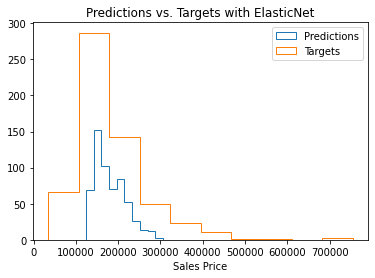

In [288]:
plt.hist(y_en, histtype = 'step', label = 'Predictions')
plt.hist(y_test, histtype = 'step', label = 'Targets')
plt.xlabel('Sales Price')
plt.title('Predictions vs. Targets with ElasticNet')
plt.legend(loc = 'upper right')
plt.show()

##### ARDRegression

In [290]:
from sklearn.linear_model import ARDRegression

In [291]:
ard = ARDRegression()

In [292]:
ard.fit(x_train, y_train)

ARDRegression()

In [293]:
ard_result = permutation_importance(ard, x_train, y_train)

In [294]:
ard_features = []
for i in ard_result.importances_mean.argsort()[::-1]:
    if ard_result.importances_mean[i] - 2 * ard_result.importances_std[i] > 0:
        ard_features.append(x_train.columns[i])
        print(f"{x_train.columns[i]:<8}"
              f"{ard_result.importances_mean[i]:.3f}"
              f" +/- {ard_result.importances_std[i]:.3f}")

GrLivArea0.375 +/- 0.009
YearBuilt0.058 +/- 0.002
OverallQual0.035 +/- 0.003
BsmtExposure_Gd0.028 +/- 0.002
BldgType_1Fam0.018 +/- 0.002
SaleCondition_Partial0.016 +/- 0.001
KitchenQual_Ex0.014 +/- 0.002
BsmtQual_Ex0.013 +/- 0.000
Neighborhood_StoneBr0.013 +/- 0.002
OverallCond0.011 +/- 0.002
HouseStyle_1Story0.011 +/- 0.001
Neighborhood_NridgHt0.009 +/- 0.001
GarageArea0.009 +/- 0.001
BsmtFinType1_Unf0.009 +/- 0.001
ExterQual_Ex0.008 +/- 0.001
Neighborhood_NoRidge0.007 +/- 0.001
Functional_Typ0.005 +/- 0.001
Fireplaces0.005 +/- 0.001
Neighborhood_Crawfor0.004 +/- 0.001
SaleCondition_Normal0.004 +/- 0.000
LotConfig_CulDSac0.004 +/- 0.001
Neighborhood_Somerst0.003 +/- 0.001
Condition1_Norm0.003 +/- 0.001
Exterior1st_BrkFace0.003 +/- 0.001
Neighborhood_BrkSide0.002 +/- 0.000
BsmtFinType1_GLQ0.002 +/- 0.000
BsmtExposure_No0.002 +/- 0.000
RoofStyle_Hip0.002 +/- 0.000
Exterior1st_HdBoard0.001 +/- 0.000
YearRemodAdd0.000 +/- 0.000
MasVnrType_Stone0.000 +/- 0.000
HouseStyle_2Story0.000 +/- 0.

In [295]:
f_list = [best_features[i] for i in range(25)]
ard = ARDRegression()
ard.fit(x_train[f_list], y_train)
y_ard = ard.predict(x_test[f_list])
ard_mse = mean_squared_error(y_test, y_ard)
ard_rmse = math.sqrt(ard_mse)
ard_r2 = r2_score(y_test, y_ard)

In [296]:
ard_rmse, ard_r2

(38455.9880826454, 0.7920606978467926)

##### Histogramming Predictions vs. Targets Using ARDRegression

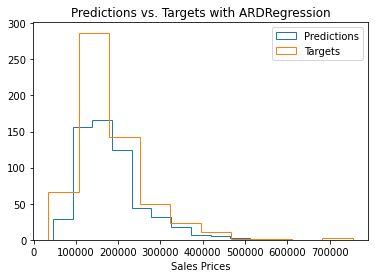

In [297]:
plt.hist(y_ard, histtype = 'step', label = 'Predictions')
plt.hist(y_test, histtype = 'step', label = 'Targets')
plt.xlabel('Sales Prices')
plt.title('Predictions vs. Targets with ARDRegression')
plt.legend(loc = 'upper right')
plt.show()

##### Table Comparison of RMSE and R2 Scores

In [182]:
from IPython.display import HTML, display
import tabulate
table = [['SGD', rmse, r2], ['SVR', svr_rmse, svr_r2], ['ElasticNet', en_rmse, en_r2], ['ARD', ard_rmse, ard_r2]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=['Model', 'RMSE', 'R2'])))

Model,RMSE,R2
SGD,31819.1,0.844012
SVR,31868.8,-0.0557472
ElasticNet,53107.4,0.565462
ARD,35166.8,0.809461


###### Visualizations of Scores

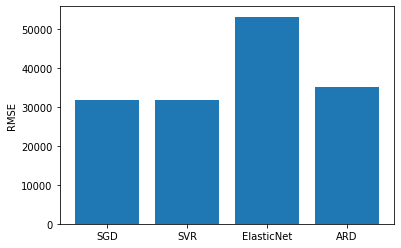

In [184]:
x_vals = ['SGD', 'SVR', 'ElasticNet', 'ARD']
y_vals = [rmse, svr_rmse, en_rmse, ard_rmse]
plt.bar(x_vals, y_vals)
plt.ylabel('RMSE')
plt.show()

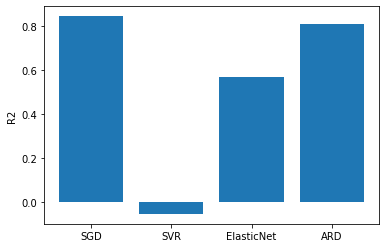

In [185]:
ys = [r2, svr_r2, en_r2, ard_r2]
plt.bar(x_vals, ys)
plt.ylabel('R2')
plt.show()

### Making Predictions on Testing Dataset Using SGDRegressor

##### Cleaning and Preprocessing Data

In [89]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [92]:
house_id = test.Id

In [93]:
test = test.drop(columns = 'Id')

In [116]:
cats = []
for col in test.columns:
    if isinstance(test[col][0], str):
        cats.append(col)

In [117]:
cats

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [119]:
counts = []
for col in test.columns:
    c = 0
    for i in test[col]:
        if str(i) == 'nan':
            c += 1
    counts.append(c)

In [124]:
counts = np.array(counts)

In [127]:
nan_indexes = np.where(counts > 0)

In [129]:
nan_cols = [test.columns[i] for i in nan_indexes]

In [133]:
nan_cols = nan_cols[0]
nan_indexes = nan_indexes[0]

In [136]:
nan_counts = []
for i in nan_cols:
    c = 0
    for j in test[i]:
        if str(j) == 'nan':
            c += 1
    nan_counts.append(c)

In [139]:
nan_counts = np.array(nan_counts)

In [141]:
drop = np.where(nan_counts > (0.4 * 1460))[0]

In [142]:
drop

array([ 2, 21, 29, 30, 31])

In [143]:
for d in drop:
    print(nan_cols[d])

Alley
FireplaceQu
PoolQC
Fence
MiscFeature


In [147]:
drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [148]:
test.shape

(1459, 79)

In [149]:
test = test.drop(columns = drop)

In [150]:
test.shape

(1459, 74)

In [151]:
nan_columns = [col for col in nan_cols if not col in drop]

In [152]:
len(nan_cols), len(nan_columns)

(33, 28)

In [153]:
nan_cols

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [163]:
test.MSZoning.describe()[2]

'RL'

In [171]:
top_variables = []
for col in nan_columns:
    top_variables.append(test[col].describe()[2])

In [172]:
top_variables = np.array(top_variables)

In [184]:
top_variables

array(['RL', '22.376841280775125', 'AllPub', 'VinylSd', 'VinylSd', 'None',
       '177.62590010361572', 'TA', 'TA', 'No', 'GLQ', '455.2680419797154',
       'Unf', '176.7539261267296', '437.2604858112794',
       '442.8986241678417', '0.5306475357080622', '0.2524682621647406',
       'TA', 'Typ', 'Attchd', '26.431174889801312', 'Unf',
       '0.7759450711253341', '217.04861112784332', 'TA', 'TA', 'WD'],
      dtype='<U32')

In [185]:
string_i = [0, 2, 3, 4, 5, 7, 8, 9, 10, 12, 18, 19, 20, 22, 25, 26, 27]

In [187]:
num_i = [1, 6, 11, 13, 14, 15, 16, 17, 21, 23, 24]

In [193]:
def split_nan(i_list):
    s = []
    for i in i_list:
        s.append(nan_columns[i])
    return s

In [194]:
cat_nan = split_nan(string_i)

In [195]:
num_nan = split_nan(num_i)

In [198]:
num_nan

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [203]:
for n in num_nan:
    median = test[n].describe()[5]
    test[n] = test[n].replace(to_replace = nan, value = median)

In [205]:
pd.unique(test.BsmtFullBath)

array([0., 1., 2., 3.])

In [206]:
test[cat_nan[0]].describe()

count     1455
unique       5
top         RL
freq      1114
Name: MSZoning, dtype: object

In [207]:
for cat in cat_nan:
    test[cat] = test[cat].astype(str)

In [208]:
for cat in cat_nan:
    mode = test[cat].describe()[2]
    test[cat] = test[cat].replace(to_replace = 'nan', value = mode)

In [210]:
pd.unique(test.MSZoning)

array(['RH', 'RL', 'RM', 'FV', 'C (all)'], dtype=object)

Shouldn't be any more nan values.

In [212]:
test_categorical, test_numeric = [], []

In [214]:
for col in test.columns:
    if isinstance(test[col][0], str):
        test_categorical.append(col)
    else:
        test_numeric.append(col)

##### MinMaxScaler

In [219]:
minmax = MinMaxScaler()

In [220]:
minmax.fit(test[test_numeric])

MinMaxScaler()

In [221]:
test[test_numeric] = minmax.transform(test[test_numeric])

##### Get Dummies

In [223]:
test = pd.get_dummies(test, columns = test_categorical)

In [224]:
test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.329609,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,0.094364,...,0,0,0,1,0,0,0,0,1,0
1,0.000000,0.335196,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,0.235294,0.296089,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,0.235294,0.318436,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,0.588235,0.122905,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.000000,0.008453,0.333333,0.750,0.694656,0.333333,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1455,0.823529,0.000000,0.007691,0.333333,0.500,0.694656,0.333333,0.000000,0.062843,0.000000,...,0,0,0,1,1,0,0,0,0,0
1456,0.000000,0.776536,0.336115,0.444444,0.750,0.618321,0.766667,0.000000,0.305237,0.000000,...,0,0,0,1,1,0,0,0,0,0
1457,0.382353,0.229050,0.162724,0.444444,0.500,0.862595,0.700000,0.000000,0.084040,0.000000,...,0,0,0,1,0,0,0,0,1,0


##### SGDRegressor on Testing Dataset

In [226]:
reg = SGDRegressor()

In [229]:
reg.fit(x_train, y_train)

SGDRegressor()

In [230]:
result = permutation_importance(reg, x_train, y_train)

In [231]:
best_features = []
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        best_features.append(x_train.columns[i])
        print(f"{x_train.columns[i]:<8}"
              f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")

OverallQual0.026 +/- 0.002
2ndFlrSF0.019 +/- 0.001
BsmtExposure_Gd0.017 +/- 0.002
FullBath0.013 +/- 0.001
GrLivArea0.011 +/- 0.000
Fireplaces0.011 +/- 0.002
TotRmsAbvGrd0.010 +/- 0.001
KitchenQual_Ex0.010 +/- 0.002
BsmtQual_Ex0.010 +/- 0.001
BsmtExposure_No0.008 +/- 0.001
BldgType_1Fam0.008 +/- 0.000
GarageArea0.008 +/- 0.001
1stFlrSF0.008 +/- 0.001
Neighborhood_StoneBr0.007 +/- 0.002
BsmtFinType1_GLQ0.007 +/- 0.001
YearRemodAdd0.007 +/- 0.001
MasVnrArea0.007 +/- 0.000
GarageCars0.007 +/- 0.001
Neighborhood_NAmes0.006 +/- 0.001
Neighborhood_NoRidge0.006 +/- 0.000
Neighborhood_Crawfor0.005 +/- 0.001
KitchenQual_TA0.004 +/- 0.001
Neighborhood_NridgHt0.004 +/- 0.001
Condition1_Norm0.004 +/- 0.000
ExterQual_TA0.004 +/- 0.001
LotConfig_CulDSac0.004 +/- 0.000
ExterQual_Ex0.004 +/- 0.001
TotalBsmtSF0.004 +/- 0.000
HalfBath0.003 +/- 0.001
BsmtFinSF10.003 +/- 0.000
Neighborhood_CollgCr0.003 +/- 0.001
Neighborhood_Edwards0.003 +/- 0.001
Neighborhood_Gilbert0.003 +/- 0.001
SaleType_WD0.003 +/- 0.

In [232]:
f_list = [best_features[i] for i in range(30)]
reg = SGDRegressor()
reg.fit(x_train[f_list], y_train)
y_predictions = reg.predict(test[f_list])

In [233]:
house_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [235]:
len(y_predictions)

1459

In [236]:
data = {'HouseID': house_id, 'Predictions': y_predictions}

In [237]:
finalized = pd.DataFrame(data)

In [239]:
finalized.to_csv('test_dataset_predictions_sgd_model.csv')